<a href="https://colab.research.google.com/github/dD2405/Intro_to_TensorFlow/blob/master/Linear_Regression_and_TFLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running TFLite models

In [1]:
try:
    %tensorflow_version 2.x
except:
    pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

## Create a basic model of the form y = mx + c

In [4]:
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss = 'mean_squared_error')
model.fit(x, y, epochs=200, verbose=1)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 2s 309ms/sample - loss: 55.0821
Epoch 2/200
6/6 [==============================] - 0s 2ms/sample - loss: 43.7491
Epoch 3/200
6/6 [==============================] - 0s 966us/sample - loss: 34.8243
Epoch 4/200
6/6 [==============================] - 0s 1ms/sample - loss: 27.7945
Epoch 5/200
6/6 [==============================] - 0s 811us/sample - loss: 22.2555
Epoch 6/200
6/6 [==============================] - 0s 1ms/sample - loss: 17.8898
Epoch 7/200
6/6 [==============================] - 0s 1ms/sample - loss: 14.4473
Epoch 8/200
6/6 [==============================] - 0s 944us/sample - loss: 11.7312
Epoch 9/200
6/6 [==============================] - 0s 951us/sample - loss: 9.5868
Epoch 10/200
6/6 [==============================] - 0s 974us/sample - loss: 7.8924
Epoch 11/200
6/6 [==============================] - 0s 929us/sample - loss: 6.5521
Epoch 12/200
6/6 [==============================] - 0s 757us/sample - loss: 5

## Generate a SavedModel

In [5]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


## Convert the SavedModel to TFLite

In [0]:
# convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [7]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

## Initialize the TFLite interpreter to try it out

In [0]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

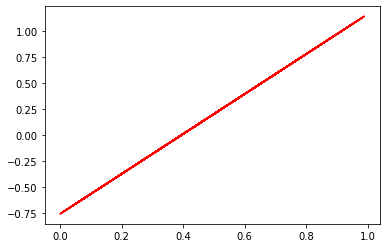

In [11]:
plt.plot(inputs, outputs, 'r')
plt.show()